# **Regression Logistique - brief 4**

<H1 style="color: #FF0000">RETRAVAILLER À PARTIR DU POINT 6</H1>
<p style="color: #0000FF"> Notion régression logistique comprise en théorie, mais la mise en pratique avec sklearn pose de gros problème</p>

## **1. Réaliser une veille sur la régression logistique**

<span style="color: #FF0000">  <b>s'aider des tutoriels</b> pour en rédiger un</span>

## **2. Récupérer les données CSV / Python panda**

In [172]:
import pandas as pd

pomdata=pd.read_csv("pompompidou.csv")

#print(pomdata)

## **3. Chargement des données dans une base de données relationnelle MySQL.**

## **4. Utiliser un jupyter-notebook pour le travail qui suit.**

Chef, oui chef !

## **5. Visualiser et analyser les données avec les librairies Matplotlib et Seaborn.**

Répartition Homme femme dans l'échatillon
196 204


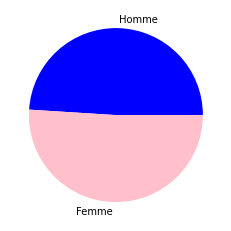

Il n'y a pas de sur-représentation d'un sexe par rapport à l'autre. Sur ce critère l'échantillon est homogène.


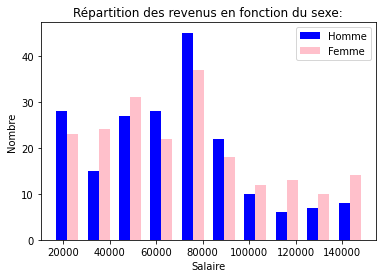

On ne constate pas de forte disparité.


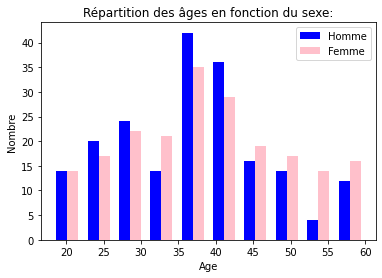

Ici aussi le jeux de données est homogène.


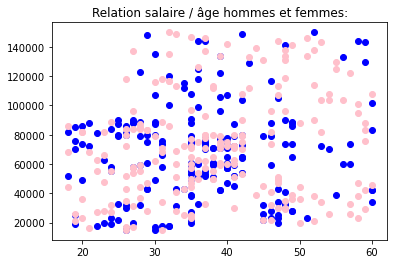

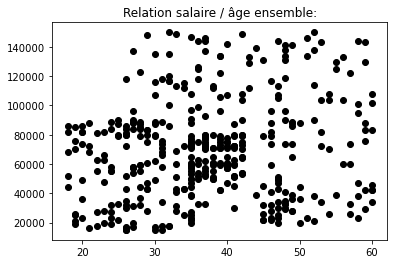

Aucune différences h/f constaté.
Mise en évidence d'une 'zonne blanche'. Les jeunes ayant de faibles revenus n'achète pas d'apple
Il n'y a pas de différence significative entre le comportement des femmes et des hommes.


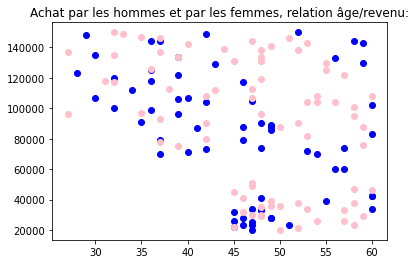

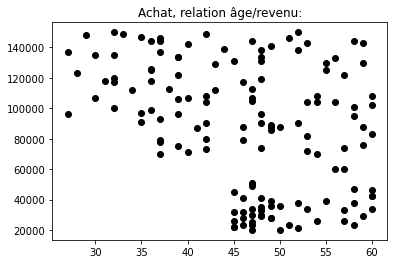

Mise en évidence d'une 'zonne blanche'. Les jeunes ayant de faibles revenus n'achète pas d'apple
Il n'y a pas de différence significative entre le comportement des femmes et des hommes.


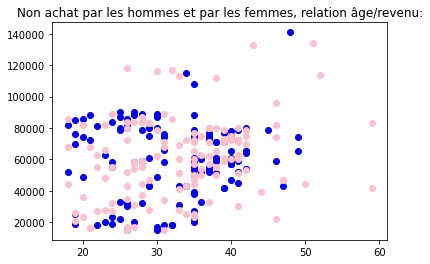

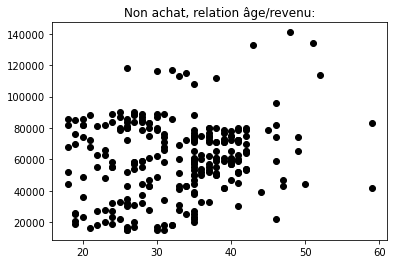

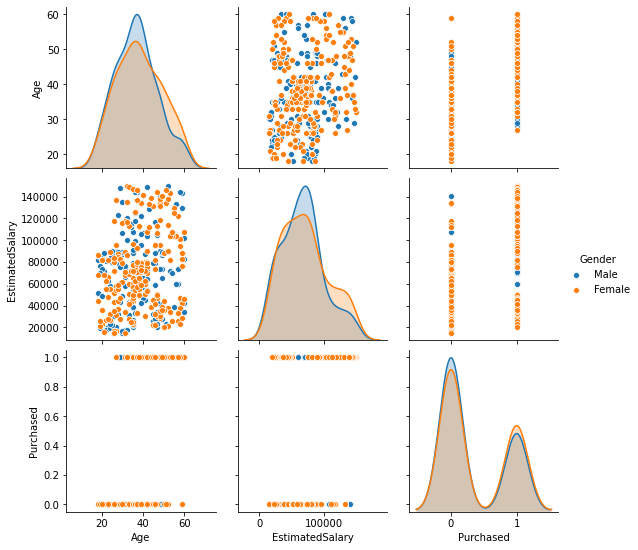

In [174]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import sklearn as  skl
from sklearn.linear_model import LinearRegression

pomdata=pd.read_csv("pompompidou.csv")

# Le champ gender doit-être convertie en données booléenne:
# Voir la exemple dans http://www.python-simple.com/python-pandas/modif-dataframes.php
# Il y a plusieurs façon d'y arriver, en voici 2:
#pomdata['Gender'] = pomdata['Gender'].replace({'Male':0, 'Female':1})
#pomdata['Gender'] = pomdata['Gender'].replace(['Male','Female'],[0,1])

del pomdata['User ID'] # La colonne 'User ID' ne sert à rien dans l'étude des données, on la supprime

# Étude de l'échantillon

print("Répartition Homme femme dans l'échatillon")
homme= pomdata[pomdata['Gender']=='Male'] # Crée un dataframme contenant les données concernant les hommes
femme= pomdata[pomdata['Gender']=='Female']

print(len(homme.index), len(femme.index))
ph=len(homme.index)/len(pomdata.index)
pf=len(femme.index)/len(pomdata.index)

plt.pie([ph,pf], labels = ['Homme', 'Femme'], colors= ['blue','pink'])
plt.show()
print("Il n'y a pas de sur-représentation d'un sexe par rapport à l'autre. Sur ce critère \
l'échantillon est homogène.")

plt.title("Répartition des revenus en fonction du sexe:")
res = plt.hist([homme['EstimatedSalary'],femme['EstimatedSalary']], rwidth = 0.7, \
               color= ['blue','pink'], label = ['Homme','Femme'])
plt.ylabel('Nombre')
plt.xlabel('Salaire')
plt.legend()
plt.show()
print("On ne constate pas de forte disparité.")

plt.title("Répartition des âges en fonction du sexe:")
plt.hist([homme['Age'],femme['Age']], rwidth = 0.7, color= ['blue','pink'], label = ['Homme','Femme'])
plt.ylabel('Nombre')
plt.xlabel('Age')
plt.legend()
plt.show()
print("Ici aussi le jeux de données est homogène.")

plt.title("Relation salaire / âge hommes et femmes:")
plt.scatter(homme['Age'], homme['EstimatedSalary'], c = 'blue')
plt.scatter(femme['Age'], femme['EstimatedSalary'], c = 'pink')
plt.show()
plt.title("Relation salaire / âge ensemble:")
plt.scatter(pomdata['Age'], pomdata['EstimatedSalary'], c = 'black')
plt.show()
print("Aucune différences h/f constaté.")

"""
df= pd.DataFrame({'A': homme['EstimatedSalary'], 'B': femme['EstimatedSalary']},index = pomdata['Age'])
plt.plot(df,marker = 'o', linestyle = 'none')
plt.show()

plt.hist(pomdata['EstimatedSalary'],rwidth = 0.5, density= True)
plt.show()
"""

# etude hom femm sur les achats
print("Mise en évidence d'une 'zonne blanche'. Les jeunes ayant de faibles revenus n'achète pas d'apple")
print("Il n'y a pas de différence significative entre le comportement des femmes et des hommes.")
achatfem= femme[femme['Purchased']==True]
achathom= homme[homme['Purchased']==True]
achat= pomdata[pomdata['Purchased']==True]
plt.title("Achat par les hommes et par les femmes, relation âge/revenu:")
plt.scatter(achathom['Age'], achathom['EstimatedSalary'], c = 'blue')
plt.scatter(achatfem['Age'], achatfem['EstimatedSalary'], c = 'pink')
plt.show()
plt.title("Achat, relation âge/revenu:")
plt.scatter(achat['Age'], achat['EstimatedSalary'], c = 'black')
#plt.scatter(pomdata['Age'], pomdata['EstimatedSalary'], c = 'green')
plt.show()

# etude hom femm sur les achats
print("Mise en évidence d'une 'zonne blanche'. Les jeunes ayant de faibles revenus n'achète pas d'apple")
print("Il n'y a pas de différence significative entre le comportement des femmes et des hommes.")
nonachatfem= femme[femme['Purchased']==False]
nonachathom= homme[homme['Purchased']==False]
nonachat= pomdata[pomdata['Purchased']==False]
plt.title("Non achat par les hommes et par les femmes, relation âge/revenu:")
plt.scatter(nonachathom['Age'], nonachathom['EstimatedSalary'], c = 'blue')
plt.scatter(nonachatfem['Age'], nonachatfem['EstimatedSalary'], c = 'pink')
plt.show()
plt.title("Non achat, relation âge/revenu:")
plt.scatter(nonachat['Age'], nonachat['EstimatedSalary'], c = 'black')
#plt.scatter(pomdata['Age'], pomdata['EstimatedSalary'], c = 'green')
plt.show()

# Je ne suis pas sur de comprendre l'intérêt de l'affichage de pairplot.... mais il est demandé :)
sns.pairplot(pomdata, hue='Gender')



### **Conclusion**  
L'échantillon est homogène sur:
* Représentation hommes / femmes.
* La répartition des revenus en fonction du sexe ne fait pas apparaître de déséquilibre.
* La répartition des âges en fonction du sexe est homogène.
* Il ne semble pas y avoir de différences majeures entre le comportement des femmes et des hommes en ce qui concerne l'acte d'achat des apples. En première approximation, et pour symplifier les calculs, **le sexe ne sera pas pris en considération.**
* Mise en évidence d'une 'zonne blanche'. Les jeunes ayant de faibles revenus n'achète pas d'apple". Étonnant non ?
* 3 catégories apparaissent: Les **hauts revenus** achètent quelque soit leur âge, **Les "séniors"** achètent quelque soit leurs revenus et les **jeunes avec de faibles revenus** n'achètent pas. 

On notera une trés faible représentation des mâles de 55 ans! Ceci pourrait être dû a un comportement de type Mante religieuse chez les females sur cette tranche d'âge, ou à une faiblesse structurelle du mâle de cet âge. Bien que cela sorte du cadre de l'étude, je devrais m'y interesser de prés!  

## **6. Résoudre le cas d’étude présenté ci-dessous avec la librairie Scikit-Learn.**

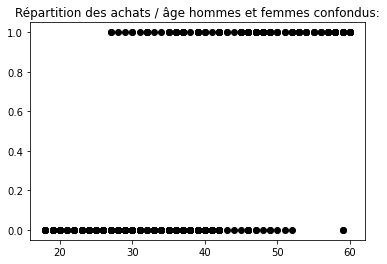

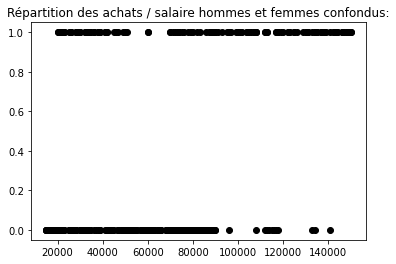

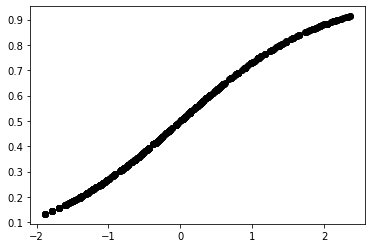

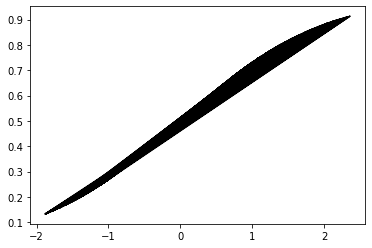

LogisticRegression()
print p37_67000: [[37, 67000]]
reg predict [[0. 1.]]
Qualité de la prédiction (0= nulle, 1= parfaite) : 0.3575
Donc... binairement parlant ??!!!: [[37, 67000]]
[[2.2650175  1.13359623]]
                     coef
constante       -1.085670
Age              2.265017
EstimatedSalary  1.133596
Optimization terminated successfully.
         Current function value: 0.686532
         Iterations 3


'\nplt.plot(pomdata[\'Age\'], pomdata[\'EstimatedSalary\'],\'o\',color="green")\nplt.show()\n\n'

In [142]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import sklearn as  skl
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler as stdsc

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

import statsmodels.api as sm
import math

def sigmoid(input):    
    output = 1 / (1 + np.exp(-input))
    return output



pomdata=pd.read_csv("pompompidou.csv")

del pomdata['User ID'] # La colonne 'User ID' ne sert à rien dans l'étude des données, on la supprime

# Extration des données

homme= pomdata[pomdata['Gender']=='Male'] # Crée un dataframme contenant les données concernant les hommes
femme= pomdata[pomdata['Gender']=='Female']

# Proportion H/F
ph=len(homme.index)/len(pomdata.index)
pf=len(femme.index)/len(pomdata.index)

achatfem= femme[femme['Purchased']==True]
achathom= homme[homme['Purchased']==True]
achat= pomdata[pomdata['Purchased']==True]

nonachatfem= femme[femme['Purchased']==False]
nonachathom= homme[homme['Purchased']==False]
nonachat= pomdata[pomdata['Purchased']==False]


# Seules les données âge et salaires seront pris en compte pour cette étude

plt.title("Répartition des achats / âge hommes et femmes confondus:")
plt.scatter(pomdata['Age'], pomdata['Purchased'], c = 'black')
plt.show()
plt.title("Répartition des achats / salaire hommes et femmes confondus:")
plt.scatter(pomdata['EstimatedSalary'], pomdata['Purchased'], c = 'black')
plt.show()

"""
https://realpython.com/logistic-regression-python/
http://www.xavierdupre.fr/app/papierstat/helpsphinx/notebooks/wines_color.html
http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/fr_Tanagra_Python_Regression_Logistique.pdf
https://www.stat4decision.com/fr/faire-une-regression-logistique-avec-python/
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
https://delladata.fr/regression-logistique/
https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python
http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/fr_Tanagra_Python_Regression_Logistique.pdf
https://www.stat4decision.com/fr/faire-une-regression-logistique-avec-python/
https://simplonline.co/briefs/f0783739-3aeb-4a2b-800a-e280ee785c3c
Regression Logistique pdf d'Anne Laure
"""

#-------------------------------------------------------------------------------------------------------------
#
# Initialisation des 'X et y' et normalisation des données.
# Y a t il un sens à normaliser les donnée quand on a un seul paramètre en 'X'?
#
#-------------------------------------------------------------------------------------------------------------

Xas= pomdata[['Age','EstimatedSalary']]
y= pomdata["Purchased"].values.reshape(-1,1)
ynr= pomdata["Purchased"] # Au cas ou.... la fonction se contenterai d'une colonne

Xage= pomdata['Age']
Xsalaire= pomdata['EstimatedSalary']

Xas= stdsc().fit_transform(Xas)
#ynorm= stdsc().fit_transform(y)

#-------------------------------------------------------------------------------------------------------------
#
#
#-------------------------------------------------------------------------------------------------------------



init_parameters = {} 
init_parameters["weight"] = np.zeros(Xas.shape[1])
init_parameters["bias"] = 0
#print(init_parameters["bias"])
sigma=(np.exp(Xas))/(1+np.exp(Xas))
#print("exp Xas:",sigma)
#sigma = sigmoid(np.dot(Xas, init_parameters["weight"]) + init_parameters["bias"])
#print(np.dot(Xas))
#print(sigma)






plt.scatter(Xas,sigma, c = 'black')
plt.show()
plt.plot(Xas,sigma, c = 'black')
plt.show()










#regressor = LinearRegression()
regressor = LogisticRegression()
reg=regressor.fit(Xas, ynr)
print(reg)

ytest = reg.predict(Xas) 
p37_67000= [[37,67000]]
print("print p37_67000:",p37_67000)

print("reg predict",reg.predict_proba([[37,67000]]))


"""
X2 = [
    [0, 37, 67000], #Man, 37 old, income : 67k
]

X2 = scale.transform(X2)

predX2 = LR.predict(X2) #Predict on the values we have adding

print(predX2)
"""



print("Qualité de la prédiction (0= nulle, 1= parfaite) :",reg.score(X,ynr))
print("Donc... binairement parlant ??!!!:",p37_67000)
#print(reg.predict_proba(X))
#print(reg.decision_function(X))
#print(reg.densify())
print(reg.coef_)


# -------------------------------------
#
# Je ne comprend rien à ces coefs !
#
# -------------------------------------
print(pd.DataFrame(np.concatenate([reg.intercept_.reshape(-1,1), reg.coef_],axis=1), index = ["coef"],\
             columns = ["constante"]+list(X.columns)).T)

# -------------------------------------
#
# Je ne comprend rien à ces coefs !
#
# -------------------------------------

# on ajoute une colonne pour la constante
x_stat = sm.add_constant(X)
# on ajuste le modèle
model = sm.Logit(y, X)
result = model.fit()
result.summary()

"""
# -------------------------------------
# échantillon à faire... mais semble ne pas fonctionner!
# -------------------------------------

reg=regressor.fit(X, y)
xval = cross_val_score(reg, X, y, cv = 5)
print("moyenne: ",xval.mean() *100)
#regressor.fit(dfc['Year'].values.reshape(-1,1), dfc['Selling_Price']) # reshape indispensable sinon erreur!
"""

#plt.plot(Xas,ytest,'o')
#plt.show()

"""
plt.plot(pomdata['Age'], pomdata['EstimatedSalary'],'o',color="green")
plt.show()

"""

<span style="color: #FF0000">  <b>Si maintenant nous avons un nouveau client potentiel qui a 37 ans et gagne 
67000 $, pouvons-nous prédire s'il achètera un iPhone ou non (Acheter? / Ne pas acheter?)</span>

## **7. Résoudre le cas d’étude présenté ci-dessous avec votre propre classe python sans utiliser la librairie Scikit-Learn.**

## **8. Rendre accessible votre notebook via Github.**

https://github.com/jpphi/brief4-regLog

## **9. Partager votre lien github comme rendu dans Simplonline. Le cas d'étude !!**
Imaginez que vous soyez gérant de magasin au magasin APPLE, augmenter de 10% le chiffre d'affaires est votre objectif ce mois-ci. Par conséquent, vous devez savoir qui sont les clients potentiels afin de maximiser le montant de la vente.
Les informations client dont vous disposez incluent le salaire estimé, le sexe, l'âge et le numéro client (Estimated Salary, Gender, Age, and Customer ID).